In [1]:
import pandas as pd
from data import * 

data=pd.read_csv(
"data/2315676.txt",
sep='\s+',
na_values=["-9999"],
parse_dates=["DATE"],
date_format='%Y%m%d',
index_col="DATE",
skiprows=[1]
)
print(data)

                      STATION      STATION_NAME  TAVG  TMAX  TMIN
DATE                                                             
1908-01-01  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   2.0 -37.0
1908-01-02  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   6.0 -26.0
1908-01-03  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   7.0 -27.0
1908-01-04  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN  -3.0 -27.0
1908-01-05  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   4.0 -36.0
...                       ...               ...   ...   ...   ...
2020-10-03  GHCND:FI000007501  SODANKYLA-AWS-FI  47.0  51.0   NaN
2020-10-04  GHCND:FI000007501  SODANKYLA-AWS-FI  43.0  47.0  37.0
2020-10-05  GHCND:FI000007501  SODANKYLA-AWS-FI  42.0   NaN  37.0
2020-10-06  GHCND:FI000007501  SODANKYLA-AWS-FI  45.0  46.0  43.0
2020-10-07  GHCND:FI000007501  SODANKYLA-AWS-FI  47.0  50.0  44.0

[41065 rows x 5 columns]


In [2]:
print(data.head())

                      STATION      STATION_NAME  TAVG  TMAX  TMIN
DATE                                                             
1908-01-01  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   2.0 -37.0
1908-01-02  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   6.0 -26.0
1908-01-03  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   7.0 -27.0
1908-01-04  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN  -3.0 -27.0
1908-01-05  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   4.0 -36.0


In [3]:

data['TAVG_C'] = data['TAVG'].apply((lambda x: (int(x) - 32) /1.8 if pd.notnull(x) else pd.NA))
data['TMAX_C'] = data['TMAX'].apply((lambda x: (int(x) - 32) /1.8 if pd.notnull(x) else pd.NA))
data['TMIN_C'] = data['TMIN'].apply((lambda x: (int(x) - 32) /1.8 if pd.notnull(x) else pd.NA))
print(data)


                      STATION      STATION_NAME  TAVG  TMAX  TMIN    TAVG_C  \
DATE                                                                          
1908-01-01  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   2.0 -37.0       NaN   
1908-01-02  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   6.0 -26.0       NaN   
1908-01-03  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   7.0 -27.0       NaN   
1908-01-04  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN  -3.0 -27.0       NaN   
1908-01-05  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   4.0 -36.0       NaN   
...                       ...               ...   ...   ...   ...       ...   
2020-10-03  GHCND:FI000007501  SODANKYLA-AWS-FI  47.0  51.0   NaN  8.333333   
2020-10-04  GHCND:FI000007501  SODANKYLA-AWS-FI  43.0  47.0  37.0  6.111111   
2020-10-05  GHCND:FI000007501  SODANKYLA-AWS-FI  42.0   NaN  37.0  5.555556   
2020-10-06  GHCND:FI000007501  SODANKYLA-AWS-FI  45.0  46.0  43.0  7.222222   
2020-10-07  GHCND:FI000007501  SODANKYLA-AWS-FI  47.

In [7]:
year = 1955
prev_year= str(int(year))
# Выбор данных по четырем сезонам за 1955 год
temps_winter = data.loc[((data.index >= prev_year+"1201") & (data.index < prev_year+"0301"))]
temps_spring = data.loc[((data.index >= prev_year + "0301" ) & (data.index < prev_year + "0601"))]
temps_summer = data.loc[((data.index >= prev_year + "0601") & (data.index < prev_year + "0901"))]
temps_autumn = data.loc[((data.index >= prev_year + "0901") & (data.index < prev_year + "1201"))]

# Расчет средней температуры для каждого сезона
mean_winter = temps_winter["TAVG_C"].mean()
mean_spring = temps_spring["TAVG_C"].mean()
mean_summer = temps_summer["TAVG_C"].mean()
mean_autumn = temps_autumn["TAVG_C"].mean()

# Вывод результатов с округлением
print(f"Средняя температура зимой в 1955 году: {mean_winter:.0f}")
print(f"Средняя температура весной в 1955 году: {mean_spring:.0f}")
print(f"Средняя температура летом в 1955 году: {mean_summer:.0f}")
print(f"Средняя температура осенью в 1955 году: {mean_autumn:.0f}")
print (data) # Значения за зиму отстутсв.

Средняя температура зимой в 1955 году: nan
Средняя температура весной в 1955 году: -4
Средняя температура летом в 1955 году: 12
Средняя температура осенью в 1955 году: -2
                      STATION      STATION_NAME  TAVG  TMAX  TMIN    TAVG_C  \
DATE                                                                          
1908-01-01  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   2.0 -37.0       NaN   
1908-01-02  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   6.0 -26.0       NaN   
1908-01-03  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   7.0 -27.0       NaN   
1908-01-04  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN  -3.0 -27.0       NaN   
1908-01-05  GHCND:FI000007501  SODANKYLA-AWS-FI   NaN   4.0 -36.0       NaN   
...                       ...               ...   ...   ...   ...       ...   
2020-10-03  GHCND:FI000007501  SODANKYLA-AWS-FI  47.0  51.0   NaN  8.333333   
2020-10-04  GHCND:FI000007501  SODANKYLA-AWS-FI  43.0  47.0  37.0  6.111111   
2020-10-05  GHCND:FI000007501  SODANKYL

C:\Users\matve\AppData\Local\Temp\ipykernel_10412\1859689931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temps_spring['TAVG_C'] = temps_spring['TAVG_C'].fillna(temps_spring['TAVG_C'].mean())
C:\Users\matve\AppData\Local\Temp\ipykernel_10412\1859689931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temps_summer['TAVG_C'] = temps_summer['TAVG_C'].fillna(temps_summer['TAVG_C'].mean())
C:\Users\matve\AppData\Local\Temp\ipykernel_10412\1859689931.py:5: SettingWithCopyWarning: 
A value is trying to b

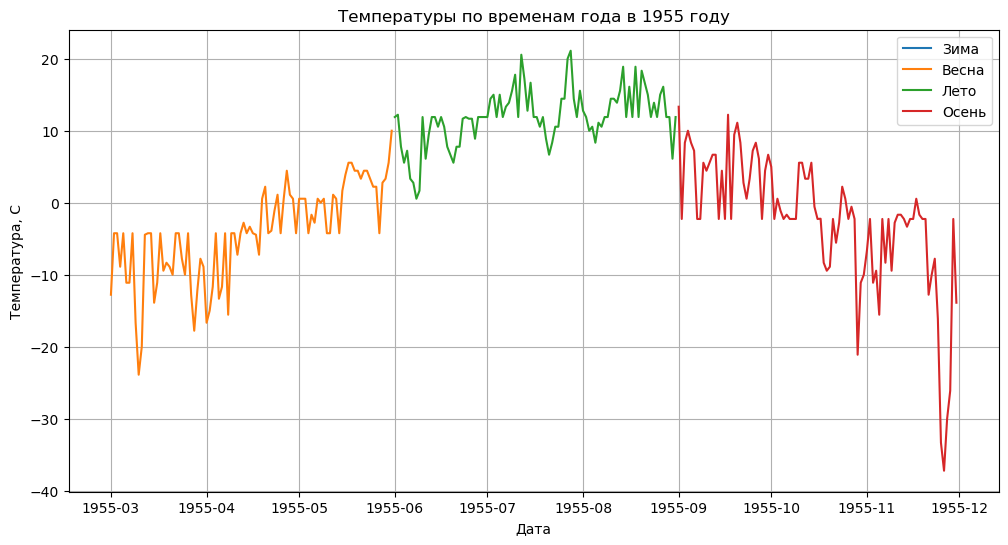

In [5]:
import matplotlib.pyplot as plt
temps_winter['TAVG_C'] = temps_winter['TAVG_C'].fillna(temps_winter['TAVG_C'].mean())
temps_spring['TAVG_C'] = temps_spring['TAVG_C'].fillna(temps_spring['TAVG_C'].mean())
temps_summer['TAVG_C'] = temps_summer['TAVG_C'].fillna(temps_summer['TAVG_C'].mean())
temps_autumn['TAVG_C'] = temps_autumn['TAVG_C'].fillna(temps_autumn['TAVG_C'].mean())

plt.figure(figsize=(12, 6))
plt.plot(temps_winter.index, temps_winter["TAVG_C"], label='Зима')
plt.plot(temps_spring.index, temps_spring["TAVG_C"], label='Весна')
plt.plot(temps_summer.index, temps_summer["TAVG_C"], label='Лето')
plt.plot(temps_autumn.index, temps_autumn["TAVG_C"], label='Осень')

plt.xlabel('Дата')
plt.ylabel('Температура, C')
plt.title('Температуры по временам года в 1955 году')
plt.legend()
plt.grid(True)

plt.show()